# Project Name - Indian food delivery restaurant aggregator

## Group 3
Group Members
1. Viswas M
2. Animesh Tripathi
3. Nandhini S O

# Zomato DataSet

About the Data: Zomato is an Indian multinational restaurant aggregator and food delivery company founded by Deepinder Goyal and Pankaj Chaddah in 2008. Zomato provides information, menus, and user reviews of restaurants as well as food delivery options from partner restaurants in select cities.

### Attributes:
1. URL - Website of the Zomato for each restaurant. - Object datatype 

2. Address - Address of the Restaurant. - Object datatype 

3. Name - Name of the restaurant. - Object datatype 

4. Online Order - The customer ordered the menu online or not. - Object datatype

5. Book table - The customer has booked the table or not. - Object datatype

6. Rate - Rating of the restaurant that has by the customer. - Numerical datatype 

7. Votes - The votes have been given by the customer to the restaurant. - Numerical datatype 

8. Phone - Contact number of the Restaurant. - Object datatype 

9. Location - The city name where the restaurant is located. - Object datatype 

10. Rest Type - The type of restaurant. - Object datatype 

11. Dish liked - Dishes liked by the customer from the restaurant. - Object datatype 

12. Cuisines - The cuisines that have been prepared by the restaurant. - Object datatype 

13. Approx Cost for two people - The approximate cost of the customer for 2 people. - Number datatype 

14. Reviews list - The reviews made by the customers on the restaurant. - Object datatype 

15. Menu Item - The menu items that are usually available at the restaurant. - Object datatype 

16. Listed in (type) - Contains the type of the meal. - Object datatype 

17. Listed in (city) - This contains the neighborhood in which the restaurant is listed. - Object datatype

# Problem Statement
## Regression
The newly started companies are not able to decide the cost that would happen per 
two people for once. So the Zomato company has a good analyst team who can predict the 
cost per two customers for one time so that the newly started restaurants and upcoming 
restaurants will be well prepared how the restaurant should invest in improving the 
ambiance and all other stuff to attract the customers. Assume you are the analyst team that 
Zomato has organized to help new and upcoming restaurants by letting them know the 
various reasons that customers look for and build a model which able to predict the cost for 
two people.
## Classification
The Aim is to classify the orders that have been ordered online and offline. And 
identify the patterns that lead to orders online orders as well as offline. Your model should 
be able to classify the classes effectively.

In [1]:
import pyforest
from statsmodels.stats.outliers_influence import variance_inflation_factor
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.metrics import confusion_matrix
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from pandas.api.types import is_string_dtype
from sklearn.feature_selection import RFE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score 
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

## EDA

In [5]:
#Read dataset and store in dataframe 

df=pd.read_csv('Zomato.csv')

<IPython.core.display.Javascript object>

In [6]:
#Checking the last 5 rows

df.tail()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
51712,https://www.zomato.com/bangalore/best-brews-fo...,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,080 40301477,Whitefield,Bar,NaN,Continental,"1,500","[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield
51713,https://www.zomato.com/bangalore/vinod-bar-and...,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,No,No,NaN,0,+91 8197675843,Whitefield,Bar,NaN,Finger Food,600,[],[],Pubs and bars,Whitefield
51714,https://www.zomato.com/bangalore/plunge-sherat...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,NaN,Whitefield,Bar,NaN,Finger Food,"2,000",[],[],Pubs and bars,Whitefield
51715,https://www.zomato.com/bangalore/chime-sherato...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,080 49652769,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield
51716,https://www.zomato.com/bangalore/the-nest-the-...,"ITPL Main Road, KIADB Export Promotion Industr...",The Nest - The Den Bengaluru,No,No,3.4 /5,13,+91 8071117272,"ITPL Main Road, Whitefield","Bar, Casual Dining",NaN,"Finger Food, North Indian, Continental","1,500","[('Rated 5.0', 'RATED\n Great ambience , look...",[],Pubs and bars,Whitefield


In [7]:
#Checking the data types and 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [8]:
#Dropping unnecessary columns


df.drop(['url', 'address', 'phone' ],axis=1, inplace = True)

In [9]:
#Converting the rating from 'x/5' to x and convert into float.
df['rate']=df['rate'].str.split("/" , 1).str.get(0)
df['rate']=df['rate'].replace(to_replace= ['NAN', 'NEW', '-'], value=[np.nan,np.nan,np.nan])
df['rate']=df['rate'].astype("float")
#Converting the cost from x,xxx to xxxx and convert into float
df['approx_cost(for two people)']=df['approx_cost(for two people)'].str.replace(',', '')
df['approx_cost(for two people)']=df['approx_cost(for two people)'].astype("float")

C:\Users\viswa\AppData\Local\Temp\ipykernel_13072\1605792981.py:2: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df['rate']=df['rate'].str.split("/" , 1).str.get(0)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [10]:
#Converting Categorical variables

df['online_order']=df['online_order'].replace(to_replace= ['Yes', 'No'], value=[1,0])
df['book_table']=df['book_table'].replace(to_replace= ['Yes', 'No'], value=[1,0])
df['online_order']=df['online_order'].astype("int")
df['book_table']=df['book_table'].astype("int")

In [11]:
df.dtypes

name                            object
online_order                     int32
book_table                       int32
rate                           float64
votes                            int64
location                        object
rest_type                       object
dish_liked                      object
cuisines                        object
approx_cost(for two people)    float64
reviews_list                    object
menu_item                       object
listed_in(type)                 object
listed_in(city)                 object
dtype: object

In [12]:
#Checking duplicate values
df[df.duplicated()]

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
596,My Tea House,1,1,NaN,0,Banashankari,Casual Dining,NaN,"Continental, Asian, North Indian, Tea",500.0,"[('Rated 4.0', ""RATED\n So apparently I visit...","['MTH Signature Soup', 'Minestrone Veg', 'Broc...",Dine-out,Banashankari
2235,Shiv Sagar,0,0,3.6,10,Bannerghatta Road,Food Court,NaN,"South Indian, Beverages",400.0,"[('Rated 4.0', 'RATED\n It was yesterday I vi...",[],Dine-out,Bannerghatta Road
4339,Biryani Treat,0,0,NaN,0,Bellandur,Quick Bites,NaN,Biryani,400.0,[],[],Delivery,Bellandur
7599,Nawab Di Biryani,1,0,NaN,0,Whitefield,"Takeaway, Delivery",NaN,"Biryani, Mughlai",400.0,"[('Rated 4.0', 'RATED\n Ordered paneer tikka ...","['Paneer Tikka Biryani', 'Veg Lucknowi Biryani...",Delivery,Brookefield
9342,Healthy Parathawala,1,0,NaN,0,BTM,Quick Bites,NaN,North Indian,200.0,[],"['Aloo Paratha Chole Combo', 'Gobi Paratha Cho...",Delivery,BTM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46553,House Of Candy,1,0,NaN,0,Malleshwaram,Confectionery,NaN,Desserts,200.0,[],[],Delivery,Rajajinagar
49193,Sri Ganesh Juice Junction,1,0,3.5,6,Bellandur,Beverage Shop,NaN,"Juices, Fast Food",200.0,"[('Rated 4.0', 'RATED\n A perfect place to dr...",[],Delivery,Sarjapur Road
49432,Biryani Treat,0,0,NaN,0,Bellandur,Quick Bites,NaN,Biryani,400.0,[],[],Delivery,Sarjapur Road
50405,House Of Candy,1,0,NaN,0,Whitefield,Confectionery,NaN,Desserts,200.0,[],[],Delivery,Whitefield


In [13]:
#Dropping duplicate values
df=df.drop_duplicates()

In [14]:
# obtain the total missing values for each variable
# 'isnull().sum()' returns the number of missing values in each variable
# sort the variables on the basis of total null values in the variable using sort_values()
# 'ascending = False' sorts values in the descending order
# the variable with highest number of missing values will appear first
Total = df.isnull().sum().sort_values(ascending=False) 

Percent = (df.isnull().sum()*100/df.isnull().count()).sort_values(ascending=False)   

# concat the 'Total' and 'Percent' columns using 'concat' function
# keys:pass a list of column names in parameter  
# axis = 1: concats along the columns
missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])

# print the missing data
missing_data

<IPython.core.display.Javascript object>

,Total,Percentage of Missing Values
dish_liked,28027,54.259109
rate,10027,19.411856
approx_cost(for two people),345,0.667906
rest_type,227,0.439463
cuisines,45,0.087118
location,21,0.040655
name,0,0.000000
online_order,0,0.000000
book_table,0,0.000000
votes,0,0.000000


<IPython.core.display.Javascript object>

<AxesSubplot:>

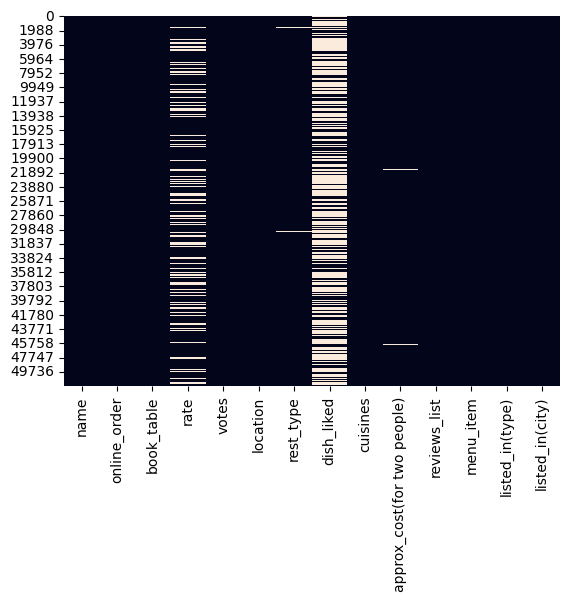

In [15]:
#Visualizing null values
sns.heatmap(df.isnull(), cbar=False)

In [16]:
#Dropping null values of cost and tyoe

df.drop(df[df['approx_cost(for two people)'].isnull()].index, inplace=True)
df.drop(df[df['rest_type'].isnull()].index, inplace=True)


In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
online_order,51105.0,0.592466,0.491380,0.0,0.0,1.0,1.0,1.0
book_table,51105.0,0.125995,0.331848,0.0,0.0,0.0,0.0,1.0
rate,41234.0,3.702037,0.440046,1.8,3.4,3.7,4.0,4.9
votes,51105.0,285.049369,806.780661,0.0,7.0,41.0,200.0,16832.0
approx_cost(for two people),51105.0,556.072302,439.593179,40.0,300.0,400.0,700.0,6000.0


In [16]:
#Checking missing values again
Total = df.isnull().sum().sort_values(ascending=False) 
Percent = (df.isnull().sum()*100/df.isnull().count()).sort_values(ascending=False)   
missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])
missing_data

<IPython.core.display.Javascript object>

,Total,Percentage of Missing Values
dish_liked,27681,54.164955
rate,9871,19.315136
cuisines,19,0.037178
name,0,0.000000
online_order,0,0.000000
book_table,0,0.000000
votes,0,0.000000
location,0,0.000000
rest_type,0,0.000000
approx_cost(for two people),0,0.000000


In [19]:
#Since we are not using dish_liked and cuisines in our project, we ignore the missing values. 
#Rate null values are delt with.

In [20]:
#Describing categorical columns

df.describe(include='object').T

,count,unique,top,freq
name,51105,8726,Cafe Coffee Day,96
location,51105,93,BTM,5056
rest_type,51105,93,Quick Bites,19018
dish_liked,23424,5241,Biryani,181
cuisines,51086,2704,North Indian,2852
reviews_list,51105,22330,[],7477
menu_item,51105,9068,[],39060
listed_in(type),51105,7,Delivery,25622
listed_in(city),51105,30,BTM,3241


<IPython.core.display.Javascript object>

<AxesSubplot:>

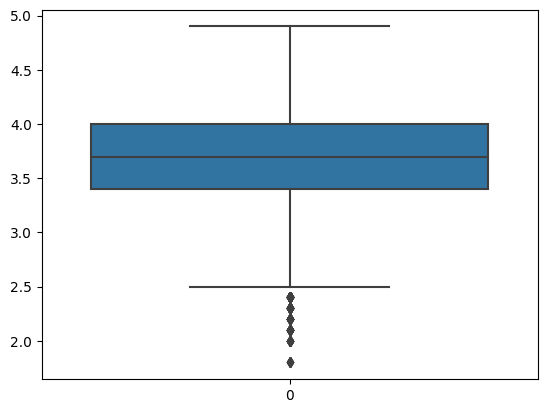

In [21]:
#Visualizing rate

sns.boxplot(df['rate'])

In [22]:
#Checking rate outliers

q1=df['rate'].quantile(0.25)
q3=df['rate'].quantile(0.75)
iqr=q3-q1

df[df['rate']<(df['rate'].quantile(0.25)-(1.5*iqr))]

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
1532,Mast Kalandar,0,0,2.4,183,Bannerghatta Road,Delivery,"Lassi, Raita, Chole, Dal Makhani, Gulab Jamun,...",North Indian,450.0,"[('Rated 3.0', 'RATED\n Average.'), ('Rated 1...",[],Delivery,Bannerghatta Road
1570,Tandoor Hut,0,0,2.2,90,Bannerghatta Road,Casual Dining,"Noodles, Tandoori Chicken","North Indian, Chinese",750.0,"[('Rated 3.0', 'RATED\n I head that this plac...",[],Delivery,Bannerghatta Road
1573,Zaika Take Away,0,0,2.4,96,Bannerghatta Road,Casual Dining,"Butter Naan, Kadhai Mushroom","North Indian, Chinese, Thai",500.0,"[('Rated 1.0', 'RATED\n Wrong order delivered...",[],Delivery,Bannerghatta Road
1647,Vasudev Adiga's,0,0,2.3,291,Bannerghatta Road,Casual Dining,"Coffee, Masala Dosa, Curd Rice, Idli Vada","South Indian, North Indian, Chinese, Street Fo...",250.0,"[('Rated 2.0', 'RATED\n A good breakfast plac...",[],Delivery,Bannerghatta Road
2028,Tandoor Hut,0,0,2.2,90,Bannerghatta Road,Casual Dining,"Noodles, Tandoori Chicken","North Indian, Chinese",750.0,"[('Rated 3.0', 'RATED\n I head that this plac...",[],Dine-out,Bannerghatta Road
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49415,Mast Kalandar,0,0,2.1,338,Bellandur,Casual Dining,"Khichda, Gaon Ki Thali, Buttermilk, Dal Makhan...",North Indian,450.0,"[('Rated 2.0', 'RATED\n Food was kind of OK ,...",[],Delivery,Sarjapur Road
49750,Madurai Idly Shop,0,0,2.1,193,Sarjapur Road,Quick Bites,"Idli, Vada, Pongal, Filter Coffee, Mini Idlis,...",South Indian,200.0,"[('Rated 1.0', 'RATED\n Well the person on th...",[],Dine-out,Sarjapur Road
49919,Bhagini,0,0,2.3,132,Bellandur,Casual Dining,"Masala Peanuts, Chicken Biryani, Roti","Andhra, South Indian, Chinese, North Indian",800.0,"[('Rated 4.0', 'RATED\n It was our friend bd...",[],Dine-out,Sarjapur Road
49964,Mast Kalandar,0,0,2.1,338,Bellandur,Casual Dining,"Khichda, Gaon Ki Thali, Buttermilk, Dal Makhan...",North Indian,450.0,"[('Rated 2.0', 'RATED\n Food was kind of OK ,...",[],Dine-out,Sarjapur Road


In [23]:
#The outliers are within the acceptable range

In [24]:
#Checking null values

df[df['rate'].isnull()]

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
72,Spicy Tandoor,0,0,NaN,0,Banashankari,Quick Bites,NaN,North Indian,150.0,"[('Rated 4.0', 'RATED\n cost for chicken roll...",[],Delivery,Banashankari
75,Om Sri Vinayaka Chats,0,0,NaN,0,Banashankari,"Takeaway, Delivery",NaN,"Street Food, Fast Food",500.0,[],[],Delivery,Banashankari
84,Chill Out,0,0,NaN,0,Banashankari,Quick Bites,NaN,"South Indian, Chinese",100.0,"[('Rated 4.0', 'RATED\n Good Location. Small ...",[],Delivery,Banashankari
90,Me And My Cake,0,0,NaN,0,Banashankari,Delivery,NaN,"Bakery, Desserts",500.0,"[('Rated 1.0', 'RATED\n Do not order anything...",[],Delivery,Banashankari
91,Sunsadm,0,0,NaN,0,Banashankari,"Takeaway, Delivery",NaN,South Indian,400.0,[],[],Delivery,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51644,Punjabi Thadka,0,0,NaN,0,Brookefield,Quick Bites,NaN,North Indian,400.0,[],[],Dine-out,Whitefield
51675,Topsy Turvey,0,0,NaN,0,Whitefield,Bar,NaN,Finger Food,900.0,"[('Rated 4.0', ""RATED\n A divine joint for Fl...",[],Drinks & nightlife,Whitefield
51710,Topsy Turvey,0,0,NaN,0,Whitefield,Bar,NaN,Finger Food,900.0,"[('Rated 4.0', ""RATED\n A divine joint for Fl...",[],Pubs and bars,Whitefield
51713,Vinod Bar And Restaurant,0,0,NaN,0,Whitefield,Bar,NaN,Finger Food,600.0,[],[],Pubs and bars,Whitefield


In [25]:
#Describing numerical values to check rate values

df.describe().T

,count,mean,std,min,25%,50%,75%,max
online_order,51105.0,0.592466,0.491380,0.0,0.0,1.0,1.0,1.0
book_table,51105.0,0.125995,0.331848,0.0,0.0,0.0,0.0,1.0
rate,41234.0,3.702037,0.440046,1.8,3.4,3.7,4.0,4.9
votes,51105.0,285.049369,806.780661,0.0,7.0,41.0,200.0,16832.0
approx_cost(for two people),51105.0,556.072302,439.593179,40.0,300.0,400.0,700.0,6000.0


In [26]:
#Imputing null values of rate with the respective hotel's median rate values

df['rate'] = df.groupby('name')['rate'].transform(lambda x: x.fillna(x.median()))

In [27]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
online_order,51105.0,0.592466,0.491380,0.0,0.0,1.0,1.0,1.0
book_table,51105.0,0.125995,0.331848,0.0,0.0,0.0,0.0,1.0
rate,43715.0,3.692978,0.437102,1.8,3.4,3.7,4.0,4.9
votes,51105.0,285.049369,806.780661,0.0,7.0,41.0,200.0,16832.0
approx_cost(for two people),51105.0,556.072302,439.593179,40.0,300.0,400.0,700.0,6000.0


In [28]:
#Around 2500 values have been imputed. Checking the rest

null_rate=df[df['rate'].isnull()]

In [29]:
null_rate.describe()

,online_order,book_table,rate,votes,approx_cost(for two people)
count,7390.000000,7390.000000,0.0,7390.0,7390.000000
mean,0.264817,0.009743,NaN,0.0,342.389581
std,0.441266,0.098231,NaN,0.0,203.168415
min,0.000000,0.000000,NaN,0.0,50.000000
25%,0.000000,0.000000,NaN,0.0,200.000000
50%,0.000000,0.000000,NaN,0.0,300.000000
75%,1.000000,0.000000,NaN,0.0,400.000000
max,1.000000,1.000000,NaN,0.0,2000.000000


In [30]:
#The missing value entries do not have any votes for that particular hotel. Hence those values are dropped

In [31]:
df.drop(df[df['rate'].isnull()].index, inplace=True)
df.reset_index()

,index,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,0,Jalsa,1,1,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,1,Spice Elephant,1,0,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,2,San Churro Cafe,1,0,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,3,Addhuri Udupi Bhojana,0,0,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,4,Grand Village,0,0,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43710,51709,The Farm House Bar n Grill,0,0,3.7,34,Whitefield,"Casual Dining, Bar",NaN,"North Indian, Continental",800.0,"[('Rated 4.0', 'RATED\n Ambience- Big and spa...",[],Pubs and bars,Whitefield
43711,51711,Bhagini,0,0,2.5,81,Whitefield,"Casual Dining, Bar","Biryani, Andhra Meal","Andhra, South Indian, Chinese, North Indian",800.0,"[('Rated 4.0', 'RATED\n A fine place to chill...",[],Pubs and bars,Whitefield
43712,51712,Best Brews - Four Points by Sheraton Bengaluru...,0,0,3.6,27,Whitefield,Bar,NaN,Continental,1500.0,"[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield
43713,51715,Chime - Sheraton Grand Bengaluru Whitefield Ho...,0,1,4.3,236,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,2500.0,"[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield


<IPython.core.display.Javascript object>

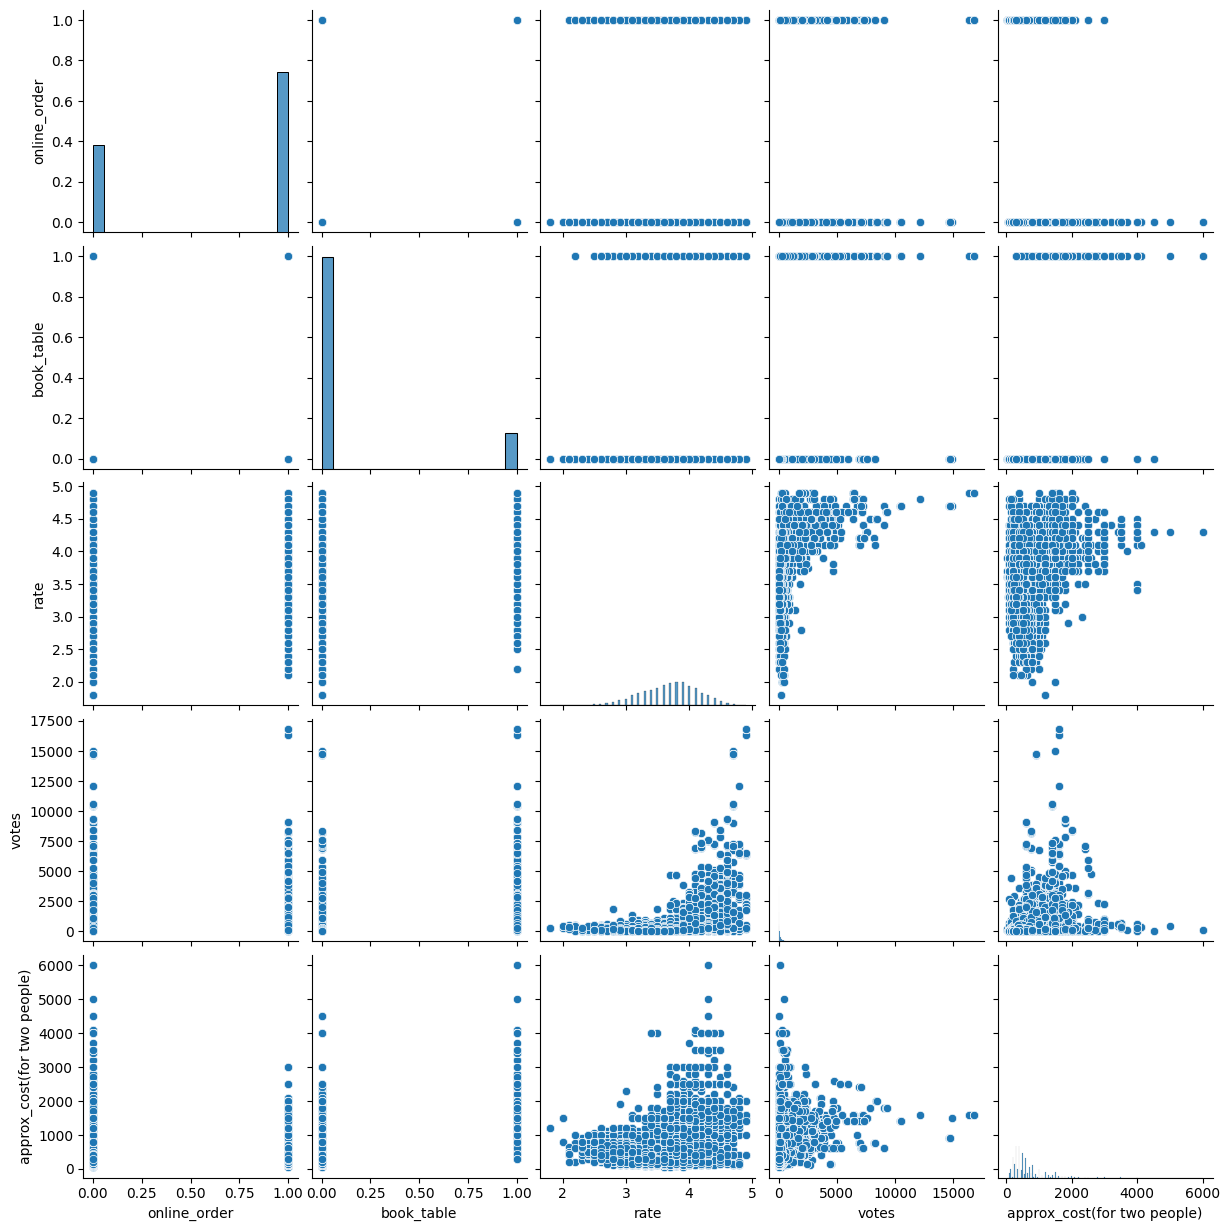

In [32]:
#Visualizing pairplot

sns.pairplot(df)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\viswa\AppData\Local\Temp\ipykernel_13072\1527993944.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot= True, cbar= True)


<AxesSubplot:>

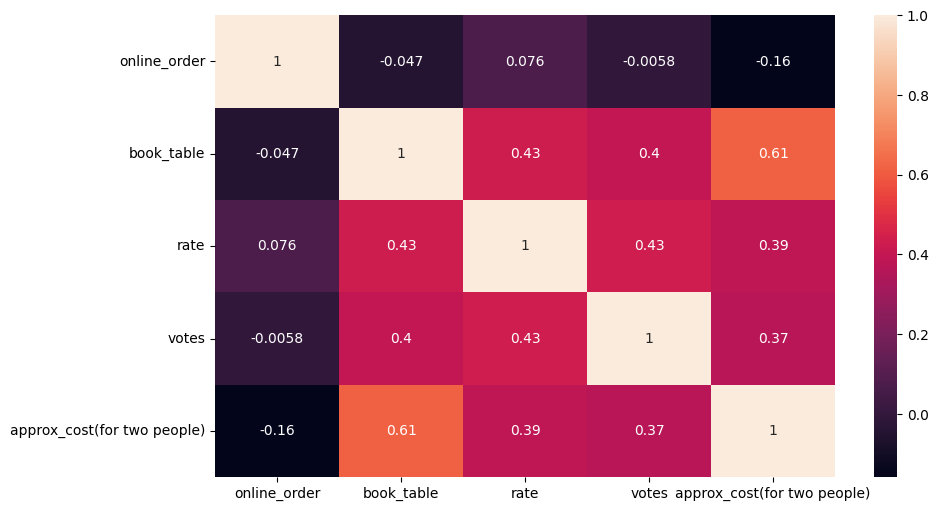

In [33]:
#Checking correlation

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot= True, cbar= True)

In [34]:
#There seems to be a positive correlation between book_table and Cost.

In [35]:
#Selecting features required for building the model

df_model=df[['online_order','book_table','rate','votes','approx_cost(for two people)', 'listed_in(type)','listed_in(city)']]
df_model.head()

,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type),listed_in(city)
0,1,1,4.1,775,800.0,Buffet,Banashankari
1,1,0,4.1,787,800.0,Buffet,Banashankari
2,1,0,3.8,918,800.0,Buffet,Banashankari
3,0,0,3.7,88,300.0,Buffet,Banashankari
4,0,0,3.8,166,600.0,Buffet,Banashankari


In [36]:
df_model.skew()

C:\Users\viswa\AppData\Local\Temp\ipykernel_13072\2583183738.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_model.skew()


online_order                  -0.619131
book_table                     2.009136
rate                          -0.287352
votes                          7.037079
approx_cost(for two people)    2.468403
dtype: float64

In [37]:
#The numerical columns are seemingly skewed.
#Hence min_max scaling to be done.
df_num=df.select_dtypes(include=np.number)
df_num=df_num.drop('approx_cost(for two people)', axis=1)
num_scale=df_num.apply(lambda rec:(rec-rec.min())/(rec.max()-rec.min()),axis=0)
num_scale.tail()

<IPython.core.display.Javascript object>

,online_order,book_table,rate,votes
51709,0.0,0.0,0.612903,0.002020
51711,0.0,0.0,0.225806,0.004812
51712,0.0,0.0,0.580645,0.001604
51715,0.0,1.0,0.806452,0.014021
51716,0.0,0.0,0.516129,0.000772


In [38]:
#Encoding the categorical variables
df_cat=df_model.select_dtypes(include='object')
df_enco=pd.get_dummies(df_cat, drop_first=True).astype("int")
df_enco.head()

<IPython.core.display.Javascript object>

,listed_in(type)_Cafes,listed_in(type)_Delivery,listed_in(type)_Desserts,listed_in(type)_Dine-out,listed_in(type)_Drinks & nightlife,listed_in(type)_Pubs and bars,listed_in(city)_Banashankari,listed_in(city)_Bannerghatta Road,listed_in(city)_Basavanagudi,listed_in(city)_Bellandur,...,listed_in(city)_Lavelle Road,listed_in(city)_MG Road,listed_in(city)_Malleshwaram,listed_in(city)_Marathahalli,listed_in(city)_New BEL Road,listed_in(city)_Old Airport Road,listed_in(city)_Rajajinagar,listed_in(city)_Residency Road,listed_in(city)_Sarjapur Road,listed_in(city)_Whitefield
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Part A- Regression

In [39]:
#Finalizing the independant columns

X=pd.concat([num_scale, df_enco], axis=1)
X.tail()

<IPython.core.display.Javascript object>

,online_order,book_table,rate,votes,listed_in(type)_Cafes,listed_in(type)_Delivery,listed_in(type)_Desserts,listed_in(type)_Dine-out,listed_in(type)_Drinks & nightlife,listed_in(type)_Pubs and bars,...,listed_in(city)_Lavelle Road,listed_in(city)_MG Road,listed_in(city)_Malleshwaram,listed_in(city)_Marathahalli,listed_in(city)_New BEL Road,listed_in(city)_Old Airport Road,listed_in(city)_Rajajinagar,listed_in(city)_Residency Road,listed_in(city)_Sarjapur Road,listed_in(city)_Whitefield
51709,0.0,0.0,0.612903,0.002020,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
51711,0.0,0.0,0.225806,0.004812,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
51712,0.0,0.0,0.580645,0.001604,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
51715,0.0,1.0,0.806452,0.014021,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
51716,0.0,0.0,0.516129,0.000772,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [40]:
#The target variable is placed in y

y=df_model['approx_cost(for two people)']
y.head()

0    800.0
1    800.0
2    800.0
3    300.0
4    600.0
Name: approx_cost(for two people), dtype: float64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\viswa\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


0.0


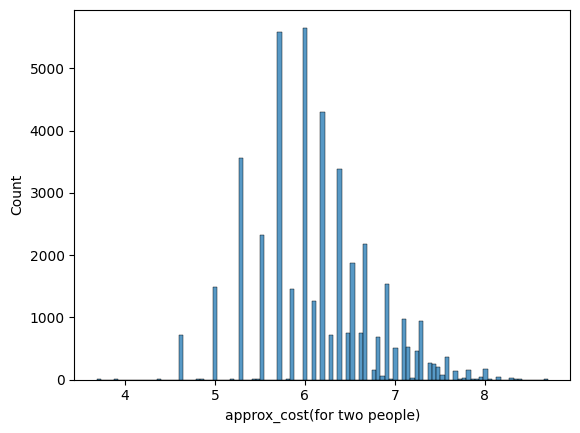

In [41]:
#Transforming dependant variable

y=np.log(y)
sns.histplot(y)
statlog, p_valuelog = stats.shapiro(y)
print(p_valuelog)

In [42]:
#Since p value<0.05, the target variable is near normal distribution

In [43]:
#Adding constant

X=pd.concat([df[['online_order','book_table','votes','rate']],df_enco],axis=1)
X=sm.add_constant(X)
X.head()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,const,online_order,book_table,votes,rate,listed_in(type)_Cafes,listed_in(type)_Delivery,listed_in(type)_Desserts,listed_in(type)_Dine-out,listed_in(type)_Drinks & nightlife,...,listed_in(city)_Lavelle Road,listed_in(city)_MG Road,listed_in(city)_Malleshwaram,listed_in(city)_Marathahalli,listed_in(city)_New BEL Road,listed_in(city)_Old Airport Road,listed_in(city)_Rajajinagar,listed_in(city)_Residency Road,listed_in(city)_Sarjapur Road,listed_in(city)_Whitefield
0,1.0,1,1,775,4.1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.0,1,0,787,4.1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.0,1,0,918,3.8,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,0,0,88,3.7,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1.0,0,0,166,3.8,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Initial OLS Model

In [44]:
#Performing initial OLS

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=1)
intial_ols_model=sm.OLS(y_train,X_train).fit()
print(intial_ols_model.summary())


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

                                 OLS Regression Results                                
Dep. Variable:     approx_cost(for two people)   R-squared:                       0.421
Model:                                     OLS   Adj. R-squared:                  0.420
Method:                          Least Squares   F-statistic:                     569.4
Date:                         Sun, 28 Jan 2024   Prob (F-statistic):               0.00
Time:                                 07:47:27   Log-Likelihood:                -22281.
No. Observations:                        30600   AIC:                         4.464e+04
Df Residuals:                            30560   BIC:                         4.497e+04
Df Model:                                   39                                         
Covariance Type:                     nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------

In [45]:
#Getting performance metrics

def get_ols_train_rmse(model):
    train_pred = model.predict(X_train)

    mse_train = mean_squared_error(y_train, train_pred)

    rmse_train = round(np.sqrt(mse_train), 4)
    
    return rmse_train

def get_ols_test_rmse(model):
    test_pred = model.predict(X_test)

    mse_test = mean_squared_error(y_test, test_pred)

    rmse_test = round(np.sqrt(mse_test), 4)

    return rmse_test

def get_ols_train_score(model,X_train, y_train):
    
    r_sq = model.rsquared
    
    r_sq_adj = model.rsquared_adj

    return [r_sq, r_sq_adj]

def get_ols_test_score(model, X_test, y_test):
    predictions_test = model.predict(X_test)
    
    r_sq_test = r2_score(y_test, predictions_test)

    n = len(y_test)
    p = X_test.shape[1]  # Number of features in X_test
    adj_r_sq_adj_test = 1 - ((1 - r_sq_test) * (n - 1) / (n - p - 1))
    
    
    return [r_sq_test, adj_r_sq_adj_test]

    

In [46]:
#Model scorecard

ols_score_card = pd.DataFrame(columns=['Model_Name', 'R-Squared_train', 'Adj. R-Squared_train',
                                       'R-Squared_test', 'Adj. R-Squared_test', 'RMSE_train', 'RMSE_test'])

def update_ols_score_card(algorithm_name, model):

    global ols_score_card

    new_data = {
        'Model_Name': algorithm_name,
        'R-Squared_train': get_ols_train_score(model,X_train, y_train)[0],
        'Adj. R-Squared_train': get_ols_train_score(model,X_train, y_train)[1],
        'R-Squared_test': get_ols_test_score(model, X_test, y_test)[0],
        'Adj. R-Squared_test': get_ols_test_score(model, X_test, y_test)[1],
        'RMSE_train': get_ols_train_rmse(model),
        'RMSE_test': get_ols_test_rmse(model)
    }


    ols_score_card = pd.concat([ols_score_card, pd.DataFrame([new_data])], ignore_index=True)
    


<IPython.core.display.Javascript object>

In [47]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
update_ols_score_card(algorithm_name='OLS Model intial Model', model=intial_ols_model)


ols_score_card


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Model_Name,R-Squared_train,Adj. R-Squared_train,R-Squared_test,Adj. R-Squared_test,RMSE_train,RMSE_test
0,OLS Model intial Model,0.420864,0.420125,0.403615,0.40179,0.5012,0.5083


In [48]:
#Checking for variance inflation factors

vif_list=[]
for i in range(X.shape[1]):
    vif_list.append(variance_inflation_factor(X.values,i))
vif_df =pd.DataFrame({'Features':X.columns,'VIF':vif_list})
vif_df_sorted = vif_df.sort_values(by='VIF', ascending=False)
vif_df_sorted

<IPython.core.display.Javascript object>

,Features,VIF
0,const,165.683561
6,listed_in(type)_Delivery,14.283639
8,listed_in(type)_Dine-out,12.640604
7,listed_in(type)_Desserts,4.397890
5,listed_in(type)_Cafes,2.799994
9,listed_in(type)_Drinks & nightlife,2.186898
29,listed_in(city)_Koramangala 7th Block,1.787119
26,listed_in(city)_Koramangala 4th Block,1.756590
27,listed_in(city)_Koramangala 5th Block,1.756150
10,listed_in(type)_Pubs and bars,1.745626


## VIF Adjusted Model

In [49]:
#Dropping VIF>10 variable

X=X.drop(['listed_in(type)_Delivery','listed_in(type)_Dine-out' ], axis=1)
X.head()

,const,online_order,book_table,votes,rate,listed_in(type)_Cafes,listed_in(type)_Desserts,listed_in(type)_Drinks & nightlife,listed_in(type)_Pubs and bars,listed_in(city)_Banashankari,...,listed_in(city)_Lavelle Road,listed_in(city)_MG Road,listed_in(city)_Malleshwaram,listed_in(city)_Marathahalli,listed_in(city)_New BEL Road,listed_in(city)_Old Airport Road,listed_in(city)_Rajajinagar,listed_in(city)_Residency Road,listed_in(city)_Sarjapur Road,listed_in(city)_Whitefield
0,1.0,1,1,775,4.1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1.0,1,0,787,4.1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1.0,1,0,918,3.8,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1.0,0,0,88,3.7,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1.0,0,0,166,3.8,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [50]:
#Second model based on VIF adjusted variables

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=1)
vif_ols_model=sm.OLS(y_train,X_train).fit()
print(vif_ols_model.summary())

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

                                 OLS Regression Results                                
Dep. Variable:     approx_cost(for two people)   R-squared:                       0.408
Model:                                     OLS   Adj. R-squared:                  0.407
Method:                          Least Squares   F-statistic:                     568.6
Date:                         Sun, 28 Jan 2024   Prob (F-statistic):               0.00
Time:                                 07:47:50   Log-Likelihood:                -22624.
No. Observations:                        30600   AIC:                         4.532e+04
Df Residuals:                            30562   BIC:                         4.564e+04
Df Model:                                   37                                         
Covariance Type:                     nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------

In [51]:
#Checking VIF again

vif_list=[]
for i in range(X.shape[1]):
    vif_list.append(variance_inflation_factor(X.values,i))
vif_df =pd.DataFrame({'Features':X.columns,'VIF':vif_list})
vif_df_sorted = vif_df.sort_values(by='VIF', ascending=False)
vif_df_sorted

<IPython.core.display.Javascript object>

,Features,VIF
0,const,110.593623
27,listed_in(city)_Koramangala 7th Block,1.787115
24,listed_in(city)_Koramangala 4th Block,1.756582
25,listed_in(city)_Koramangala 5th Block,1.756149
26,listed_in(city)_Koramangala 6th Block,1.714386
21,listed_in(city)_Jayanagar,1.672209
20,listed_in(city)_JP Nagar,1.580253
19,listed_in(city)_Indiranagar,1.536476
15,listed_in(city)_Church Street,1.529554
29,listed_in(city)_MG Road,1.522062


In [52]:
#Updating scorecard again

update_ols_score_card(algorithm_name='VIF Model', model=vif_ols_model)


ols_score_card

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Model_Name,R-Squared_train,Adj. R-Squared_train,R-Squared_test,Adj. R-Squared_test,RMSE_train,RMSE_test
0,OLS Model intial Model,0.420864,0.420125,0.403615,0.401790,0.5012,0.5083
1,VIF Model,0.407718,0.407001,0.393688,0.391926,0.5068,0.5125


## Feature selected Model

In [53]:
#Selecting best features using Sequential Feature Selector

linreg = LinearRegression()

sfs_forward_best = sfs(estimator=linreg, k_features = "best", forward=True,
                     verbose=0, scoring='r2')

lr_sfs_forward_best = sfs_forward_best.fit(X_train,y_train)

<IPython.core.display.Javascript object>

In [56]:
#List of best features

sfsf=list(lr_sfs_forward_best.k_feature_names_)
sfsf

['online_order',
 'book_table',
 'votes',
 'rate',
 'listed_in(type)_Cafes',
 'listed_in(type)_Desserts',
 'listed_in(type)_Drinks & nightlife',
 'listed_in(type)_Pubs and bars',
 'listed_in(city)_Banashankari',
 'listed_in(city)_Bannerghatta Road',
 'listed_in(city)_Basavanagudi',
 'listed_in(city)_Bellandur',
 'listed_in(city)_Brigade Road',
 'listed_in(city)_Brookefield',
 'listed_in(city)_Church Street',
 'listed_in(city)_Electronic City',
 'listed_in(city)_Frazer Town',
 'listed_in(city)_HSR',
 'listed_in(city)_Indiranagar',
 'listed_in(city)_Jayanagar',
 'listed_in(city)_Kalyan Nagar',
 'listed_in(city)_Kammanahalli',
 'listed_in(city)_Koramangala 4th Block',
 'listed_in(city)_Lavelle Road',
 'listed_in(city)_MG Road',
 'listed_in(city)_Malleshwaram',
 'listed_in(city)_Marathahalli',
 'listed_in(city)_Old Airport Road',
 'listed_in(city)_Residency Road',
 'listed_in(city)_Sarjapur Road',
 'listed_in(city)_Whitefield']

In [57]:
#Filtering unwanted variables based on feature selection

X_sfs= X[sfsf]
X_sfs.head()

,online_order,book_table,votes,rate,listed_in(type)_Cafes,listed_in(type)_Desserts,listed_in(type)_Drinks & nightlife,listed_in(type)_Pubs and bars,listed_in(city)_Banashankari,listed_in(city)_Bannerghatta Road,...,listed_in(city)_Kammanahalli,listed_in(city)_Koramangala 4th Block,listed_in(city)_Lavelle Road,listed_in(city)_MG Road,listed_in(city)_Malleshwaram,listed_in(city)_Marathahalli,listed_in(city)_Old Airport Road,listed_in(city)_Residency Road,listed_in(city)_Sarjapur Road,listed_in(city)_Whitefield
0,1,1,775,4.1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,787,4.1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,918,3.8,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,88,3.7,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,166,3.8,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
#Building model based on SFS Feature selection

X_train,X_test,y_train,y_test=train_test_split(X_sfs,y,test_size=.30,random_state=1)

sfs_model=sm.OLS(y_train,X_train).fit()
print(sfs_model.summary())

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

                                     OLS Regression Results                                     
Dep. Variable:     approx_cost(for two people)   R-squared (uncentered):                   0.986
Model:                                     OLS   Adj. R-squared (uncentered):              0.986
Method:                          Least Squares   F-statistic:                          6.838e+04
Date:                         Sun, 28 Jan 2024   Prob (F-statistic):                        0.00
Time:                                 07:49:31   Log-Likelihood:                         -34159.
No. Observations:                        30600   AIC:                                  6.838e+04
Df Residuals:                            30569   BIC:                                  6.864e+04
Df Model:                                   31                                                  
Covariance Type:                     nonrobust                                                  
                              

In [59]:
#Updating scorecard

update_ols_score_card(algorithm_name='SFS Model', model=sfs_model)


ols_score_card

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Model_Name,R-Squared_train,Adj. R-Squared_train,R-Squared_test,Adj. R-Squared_test,RMSE_train,RMSE_test
0,OLS Model intial Model,0.420864,0.420125,0.403615,0.401790,0.5012,0.5083
1,VIF Model,0.407718,0.407001,0.393688,0.391926,0.5068,0.5125
2,SFS Model,0.985785,0.985770,-0.256052,-0.259028,0.7389,0.7376


In [60]:
#Since R-squared values are not acceptable, we go for Regularization using Lasso and Ridge

In [61]:
## Lasso Model

In [62]:
#Building a lasso model


lasso = Lasso(alpha = 1)

lasso_model = lasso.fit(X_train, y_train)


train_pred = lasso_model.predict(X_train)

rmse_train = np.sqrt(mean_squared_error(y_train, train_pred))

print("Root Mean Squared Error (RMSE) on training set: ", rmse_train)

test_pred = lasso_model.predict(X_test)

# MSE for the test data
mse_test = mean_squared_error(y_test, test_pred)

rmse_test = np.sqrt(mean_squared_error(y_test, test_pred))

print("Root Mean Squared Error (RMSE) on test set: ", rmse_test)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Root Mean Squared Error (RMSE) on training set:  0.6115366783747671


<IPython.core.display.Javascript object>

Root Mean Squared Error (RMSE) on test set:  0.614613013609752


In [63]:
#Printing Lasso Scores
n = X_train.shape[0]
# 'k' denotes number of variables in train set
# 'shape[1]' returns number of columns
k = X_train.shape[1]
   
R_Squared_train_L= lasso.score(X_train, y_train)
R_Squared_test_L= lasso.score(X_test, y_test)
r_sq_adj_Train_L = 1 - ((1-R_Squared_train_L)*(n-1)/(n-k-1))
r_sq_adj_Test_L = 1 - ((1-R_Squared_test_L)*(n-1)/(n-k-1))

print(R_Squared_train_L,R_Squared_test_L,r_sq_adj_Train_L,r_sq_adj_Test_L)

0.13770381556238842 0.12794337634643083 0.13682933304087674 0.1270589954470177


In [64]:
ols_score_card.loc[3]=['Lasso', R_Squared_train_L,r_sq_adj_Train_L,R_Squared_test_L,r_sq_adj_Test_L, rmse_train, rmse_test]
ols_score_card

,Model_Name,R-Squared_train,Adj. R-Squared_train,R-Squared_test,Adj. R-Squared_test,RMSE_train,RMSE_test
0,OLS Model intial Model,0.420864,0.420125,0.403615,0.401790,0.501200,0.508300
1,VIF Model,0.407718,0.407001,0.393688,0.391926,0.506800,0.512500
2,SFS Model,0.985785,0.985770,-0.256052,-0.259028,0.738900,0.737600
3,Lasso,0.137704,0.136829,0.127943,0.127059,0.611537,0.614613


In [65]:
#Getting Lasso Coefficients

rows= X_sfs.columns
L1={'Columns': rows, 'Coeff':lasso_model.coef_}
L=pd.DataFrame(L1)
L=L.sort_values(by='Coeff')

<IPython.core.display.Javascript object>

In [66]:
#Lowest coefficient in Lasso
L.head()

,Columns,Coeff
0,online_order,-0.0
28,listed_in(city)_Residency Road,0.0
27,listed_in(city)_Old Airport Road,0.0
26,listed_in(city)_Marathahalli,-0.0
25,listed_in(city)_Malleshwaram,0.0


In [67]:
#Highest coefficient in Lasso

L.tail()

,Columns,Coeff
3,rate,0.000000
1,book_table,0.000000
14,listed_in(city)_Church Street,0.000000
30,listed_in(city)_Whitefield,0.000000
2,votes,0.000283


In [68]:
#Since most of the coefficients are zero, we try Ridge model.

In [69]:
## Ridge Model

In [70]:
#Building a ridge model


ridge = Ridge(alpha = 1)

ridge_model = ridge.fit(X_train, y_train)


train_pred = ridge_model.predict(X_train)

rmse_train = np.sqrt(mean_squared_error(y_train, train_pred))

print("Root Mean Squared Error (RMSE) on training set: ", rmse_train)

test_pred = ridge_model.predict(X_test)

# MSE for the test data
mse_test = mean_squared_error(y_test, test_pred)

rmse_test = np.sqrt(mean_squared_error(y_test, test_pred))

print("Root Mean Squared Error (RMSE) on test set: ", rmse_test)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Root Mean Squared Error (RMSE) on training set:  0.5068670016881328


<IPython.core.display.Javascript object>

Root Mean Squared Error (RMSE) on test set:  0.5124434712183857


In [71]:
#Printing Ridge Scores
n = X_train.shape[0]
# 'k' denotes number of variables in train set
# 'shape[1]' returns number of columns
k = X_train.shape[1]
   
R_Squared_train_R= ridge.score(X_train, y_train)
R_Squared_test_R= ridge.score(X_test, y_test)
r_sq_adj_Train_R = 1 - ((1-R_Squared_train_R)*(n-1)/(n-k-1))
r_sq_adj_Test_R = 1 - ((1-R_Squared_test_R)*(n-1)/(n-k-1))

print(R_Squared_train_R,R_Squared_test_R,r_sq_adj_Train_R,r_sq_adj_Test_R)

0.40762123583426646 0.39377602120944577 0.40702048532101276 0.39316122981509527


In [72]:
ols_score_card.loc[4]=['Ridge', R_Squared_train_R,r_sq_adj_Train_R,R_Squared_test_R,r_sq_adj_Test_R, rmse_train, rmse_test]
ols_score_card

,Model_Name,R-Squared_train,Adj. R-Squared_train,R-Squared_test,Adj. R-Squared_test,RMSE_train,RMSE_test
0,OLS Model intial Model,0.420864,0.420125,0.403615,0.401790,0.501200,0.508300
1,VIF Model,0.407718,0.407001,0.393688,0.391926,0.506800,0.512500
2,SFS Model,0.985785,0.985770,-0.256052,-0.259028,0.738900,0.737600
3,Lasso,0.137704,0.136829,0.127943,0.127059,0.611537,0.614613
4,Ridge,0.407621,0.407020,0.393776,0.393161,0.506867,0.512443


In [73]:
#Ridge Co-efficients

R1={'Columns': rows, 'Coeff':ridge_model.coef_}
R=pd.DataFrame(R1)
R=R.sort_values(by='Coeff')
R

<IPython.core.display.Javascript object>

,Columns,Coeff
5,listed_in(type)_Desserts,-0.235593
8,listed_in(city)_Banashankari,-0.135411
10,listed_in(city)_Basavanagudi,-0.115607
0,online_order,-0.051037
19,listed_in(city)_Jayanagar,-0.035049
2,votes,0.000086
22,listed_in(city)_Koramangala 4th Block,0.018703
9,listed_in(city)_Bannerghatta Road,0.027895
17,listed_in(city)_HSR,0.038239
27,listed_in(city)_Old Airport Road,0.058202


In [74]:
#Co-efficients with most positive impact on cost

Low=R.head()
Low

,Columns,Coeff
5,listed_in(type)_Desserts,-0.235593
8,listed_in(city)_Banashankari,-0.135411
10,listed_in(city)_Basavanagudi,-0.115607
0,online_order,-0.051037
19,listed_in(city)_Jayanagar,-0.035049


In [75]:
#Co-efficients with most positive impact on cost


High=R.tail()
High

,Columns,Coeff
12,listed_in(city)_Brigade Road,0.201945
23,listed_in(city)_Lavelle Road,0.205898
7,listed_in(type)_Pubs and bars,0.437625
6,listed_in(type)_Drinks & nightlife,0.525565
1,book_table,0.764724


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

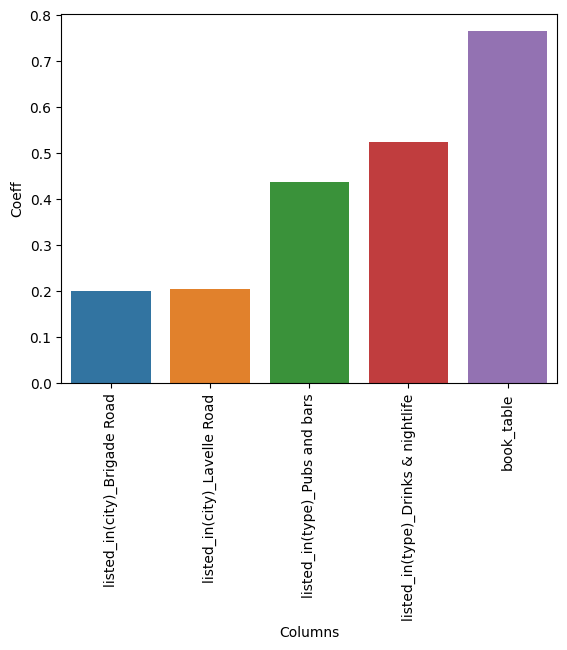

In [76]:
sns.barplot(data= High, x='Columns',  y='Coeff')
plt.xticks(rotation=90)
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

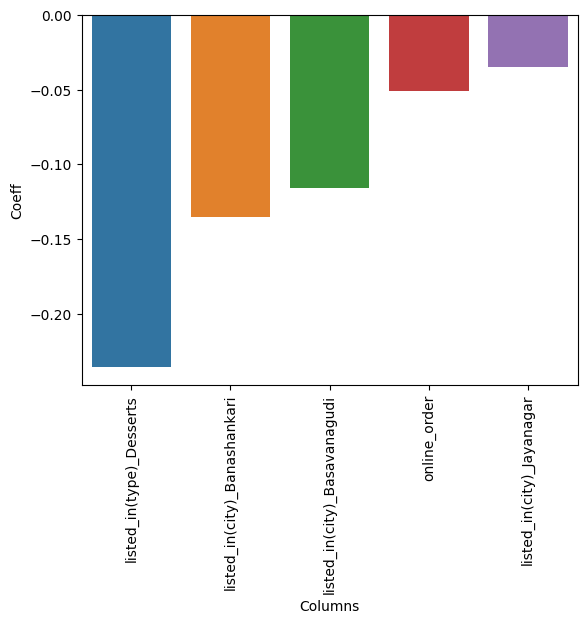

In [77]:
sns.barplot(data= Low, x='Columns',  y='Coeff')
plt.xticks(rotation=90)
plt.show()

## Part B- Classification

In [78]:
#Dependant variable for classification
y=df_model['online_order']
y

0        1
1        1
2        1
3        0
4        0
        ..
51709    0
51711    0
51712    0
51715    0
51716    0
Name: online_order, Length: 43715, dtype: int32

In [79]:
#Independant variable for classification

df_num=df_model[['rate', 'votes', 'approx_cost(for two people)']]
df_rest=df_model['book_table']
num_scale=df_num.apply(lambda rec:(rec-rec.min())/(rec.max()-rec.min()),axis=0)
df_num=pd.DataFrame(num_scale,columns=df_num.columns)
df_cat=df_model.select_dtypes(include='object')
df_cat=pd.get_dummies(df_cat, drop_first=False)
X=pd.concat([df_num, df_cat, df_rest], axis=1)
X=sm.add_constant(X)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [80]:
X.tail()

,const,rate,votes,approx_cost(for two people),listed_in(type)_Buffet,listed_in(type)_Cafes,listed_in(type)_Delivery,listed_in(type)_Desserts,listed_in(type)_Dine-out,listed_in(type)_Drinks & nightlife,...,listed_in(city)_MG Road,listed_in(city)_Malleshwaram,listed_in(city)_Marathahalli,listed_in(city)_New BEL Road,listed_in(city)_Old Airport Road,listed_in(city)_Rajajinagar,listed_in(city)_Residency Road,listed_in(city)_Sarjapur Road,listed_in(city)_Whitefield,book_table
51709,1.0,0.612903,0.002020,0.127517,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
51711,1.0,0.225806,0.004812,0.127517,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
51712,1.0,0.580645,0.001604,0.244966,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
51715,1.0,0.806452,0.014021,0.412752,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
51716,1.0,0.516129,0.000772,0.244966,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


## Initial Logistic Regression Model

In [81]:
#Initial model
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=50)
logreg=sm.Logit(y_train, X_train).fit()
print(logreg.summary())

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Optimization terminated successfully.
         Current function value: 0.573508
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:           online_order   No. Observations:                34972
Model:                          Logit   Df Residuals:                    34932
Method:                           MLE   Df Model:                           39
Date:                Sun, 28 Jan 2024   Pseudo R-squ.:                  0.1160
Time:                        07:59:12   Log-Likelihood:                -20057.
converged:                       True   LL-Null:                       -22688.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.1829      

In [82]:
#Logistic Regression Coefficients

df_odds=pd.DataFrame(np.exp(logreg.params), columns=['Odds'])
df_odds= df_odds.sort_values('Odds', ascending=False)
df_odds

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Odds
rate,14.384947
listed_in(type)_Delivery,3.559492
votes,1.710053
listed_in(city)_HSR,1.500967
listed_in(city)_Bellandur,1.426253
book_table,1.340289
listed_in(city)_Sarjapur Road,1.238516
listed_in(city)_Brookefield,1.222407
listed_in(city)_Bannerghatta Road,1.193678
listed_in(city)_BTM,1.189038


In [83]:
y_pred_prob= logreg.predict(X_test)

In [84]:
#Accuracy of the model

y_pred= [0 if x<0.5 else 1 for x in y_pred_prob]
cm=confusion_matrix(y_test, y_pred)
TN=cm[0,0]
TP=cm[1,1]
FP=cm[1,0]
FN=cm[0,1]
accuracy=(TN+TP)/(TN+TP+FN+FP)
accuracy

0.7068511952419078

In [81]:
y_pred_prob=logreg.predict(X_test)
y_pred=[0 if x<0.18 else 1 for x in y_pred_prob]
kappa=cohen_kappa_score(y_test, y_pred)
kappa


0.049615739917732604

## RFE Model

In [86]:
#Selecting best features

logreg=LogisticRegression()
rfe_model=RFE(estimator=logreg, n_features_to_select=5).fit(X_train, y_train)
feat_index= pd.Series(data=rfe_model.ranking_, index=X_train.columns)
sig_feat_rfe= feat_index[feat_index==1].index
sig_feat_rfe


<IPython.core.display.Javascript object>

C:\Users\viswa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\viswa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

<IPython.core.display.Javascript object>

Index(['rate', 'votes', 'approx_cost(for two people)',
       'listed_in(type)_Delivery', 'listed_in(type)_Drinks & nightlife'],
      dtype='object')

In [88]:
#Model based on RFE Features

logreg_rfe= sm.Logit(y_train, X_train[sig_feat_rfe]).fit()
X_test_new= X_test[sig_feat_rfe]
y_pred_prob_rfe= logreg_rfe.predict(X_test_new)
y_pred=[0 if x<0.5 else 1 for x in y_pred_prob_rfe]
print('Accuracy:', accuracy_score(y_test, y_pred))
print('F1 score:', f1_score(y_test, y_pred))

<IPython.core.display.Javascript object>

Optimization terminated successfully.
         Current function value: 0.586778
         Iterations 5
Accuracy: 0.6988447901178085
F1 score: 0.8012680202279419


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

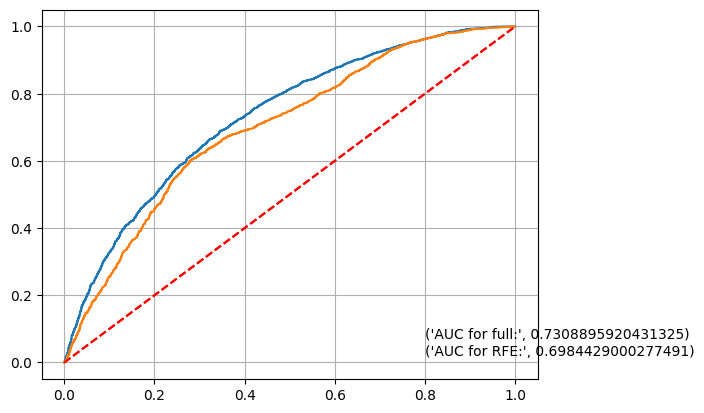

In [89]:
#RFE Model Performance

fpr, tpr, threshold = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim=([0.0,1.0])
plt.ylim=([0.0,1.0])
plt.plot([0,1], [0,1], 'r--')
plt.text(x=0.8, y=0.07, s=('AUC for full:', metrics.roc_auc_score(y_test, y_pred_prob)))
fpr1, tpr1, threshold1 = roc_curve(y_test, y_pred_prob_rfe)
plt.plot(fpr1, tpr1)
plt.xlim=([0.0,1.0])
plt.ylim=([0.0,1.0])
plt.plot([0,1], [0,1], 'r--')
plt.text(x=0.8, y=0.02, s=('AUC for RFE:', metrics.roc_auc_score(y_test, y_pred_prob_rfe)))
plt.grid(True)

In [91]:
#Coefficients

df_odds= df_odds.reset_index()
head=df_odds.head()
head

,level_0,index,Odds
0,0,rate,14.384947
1,1,listed_in(type)_Delivery,3.559492
2,2,votes,1.710053
3,3,listed_in(city)_HSR,1.500967
4,4,listed_in(city)_Bellandur,1.426253


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

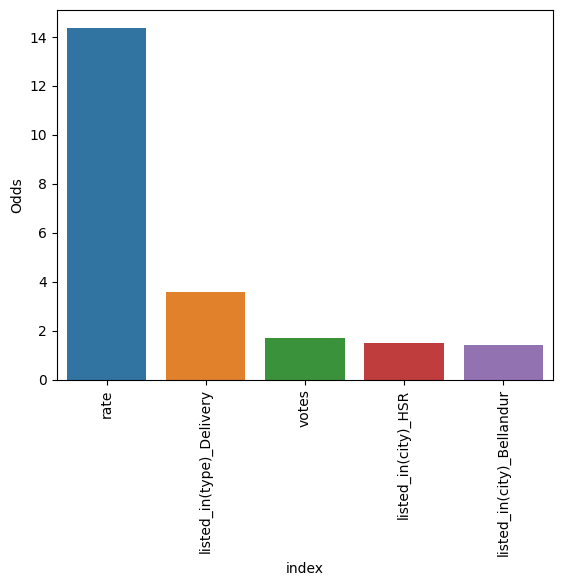

In [92]:
#Visualizing Coefficients

sns.barplot(data= head,x='index',  y='Odds')
plt.xticks(rotation=90)
plt.show()

## KNN Model

In [94]:
knn_classification = KNeighborsClassifier(n_neighbors = 3)

# fit the model using fit() on train data
knn_model = knn_classification.fit(X_train, y_train)

In [95]:
# define a to plot a confusion matrix for the model
def plot_confusion_matrix(model, test_data):
    
    # predict the target values using X_test
    y_pred = model.predict(test_data)
    
    # create a confusion matrix
    # pass the actual and predicted target values to the confusion_matrix()
    cm = confusion_matrix(y_test, y_pred)

    # label the confusion matrix  
    # pass the matrix as 'data'
    # pass the required column names to the parameter, 'columns'
    # pass the required row names to the parameter, 'index'
    conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

    # plot a heatmap to visualize the confusion matrix
    # 'annot' prints the value of each grid 
    # 'fmt = d' returns the integer value in each grid
    # 'cmap' assigns color to each grid
    # as we do not require different colors for each grid in the heatmap,
    # use 'ListedColormap' to assign the specified color to the grid
    # 'cbar = False' will not return the color bar to the right side of the heatmap
    # 'linewidths' assigns the width to the line that divides each grid
    # 'annot_kws = {'size':25})' assigns the font size of the annotated text 
    sns.heatmap(conf_matrix, annot = True, fmt = 'd', cbar = False, 
                linewidths = 0.1, annot_kws = {'size':25})

    # set the font size of x-axis ticks using 'fontsize'
    plt.xticks(fontsize = 20)

    # set the font size of y-axis ticks using 'fontsize'
    plt.yticks(fontsize = 20)

    # display the plot
    plt.show()

In [96]:
# define a function to plot the ROC curve and print the ROC-AUC score
def plot_roc(model, test_data):
    
    # predict the probability of target variable using X_test
    # consider the probability of positive class by subsetting with '[:,1]'
    y_pred_prob = model.predict_proba(test_data)[:,1]
    
    # the roc_curve() returns the values for false positive rate, true positive rate and threshold
    # pass the actual target values and predicted probabilities to the function
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)

    # plot the ROC curve
    plt.plot(fpr, tpr)

    # plot the straight line showing worst prediction for the model
    plt.plot([0, 1], [0, 1],'r--')

    # add plot and axes labels
    # set text size using 'fontsize'
    plt.title('ROC curve', fontsize = 15)
    plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
    plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

    # add the AUC score to the plot
    # 'x' and 'y' gives position of the text
    # 's' is the text 
    # use round() to round-off the AUC score upto 4 digits
    plt.text(x = 0.02, y = 0.9, s = ('AUC Score:',round(metrics.roc_auc_score(y_test, y_pred_prob),4)))

    # plot the grid
    plt.grid(True)

In [97]:
# create a generalized function to calculate the performance metrics values for test set
def get_test_report(model, test_data):
    
    # for test set:
    # test_pred: prediction made by the model on the test dataset 'X_test'
    # y_test: actual values of the target variable for the test dataset

    # predict the output of the target variable from the test data 
    test_pred = model.predict(test_data)

    # return the classification report for test data
    return(classification_report(y_test, test_pred))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

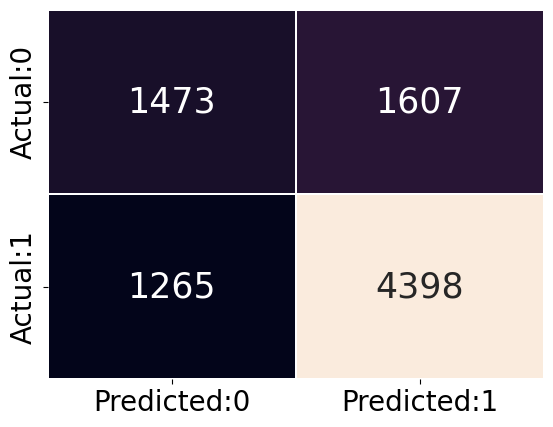

In [98]:
#Confusion matrix for KNN Model

plot_confusion_matrix(knn_model, test_data = X_test)

In [99]:
# compute the performance measures on test data
# call the function 'get_test_report'
# pass the knn model to the function
test_report = get_test_report(knn_model, test_data = X_test)

# print the performace measures
print(test_report)

              precision    recall  f1-score   support

           0       0.54      0.48      0.51      3080
           1       0.73      0.78      0.75      5663

    accuracy                           0.67      8743
   macro avg       0.64      0.63      0.63      8743
weighted avg       0.66      0.67      0.67      8743



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

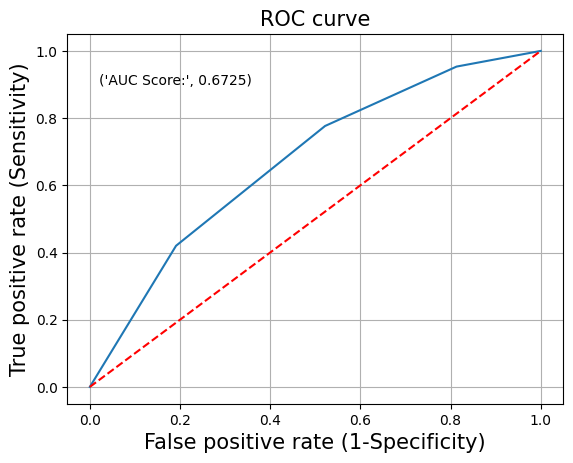

In [100]:
# call the function to plot the ROC curve
# pass the knn model to the function
plot_roc(knn_model, test_data = X_test)

In [101]:
## gaussian naive bayes model

In [102]:
# instantiate the 'GaussianNB'
gnb = GaussianNB()

# fit the model using fit() on train data
gnb_model = gnb.fit(X_train, y_train)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

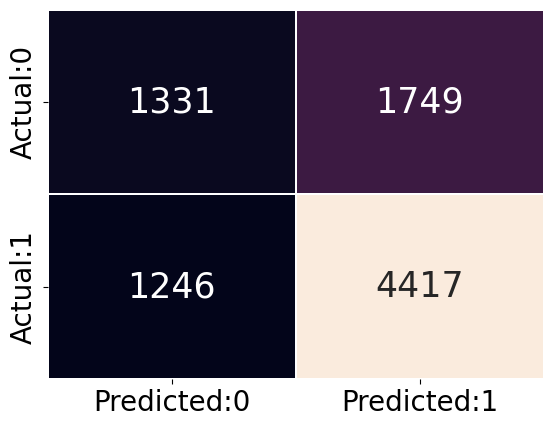

In [103]:
# call the function to plot the confusion matrix
# pass the gaussian naive bayes model to the function
plot_confusion_matrix(gnb_model, test_data=X_test)

In [104]:
# compute the performance measures on test data
# call the function 'get_test_report'
# pass the gaussian naive bayes model to the function
test_report = get_test_report(gnb_model, test_data=X_test)

# print the performace measures
print(test_report)

              precision    recall  f1-score   support

           0       0.52      0.43      0.47      3080
           1       0.72      0.78      0.75      5663

    accuracy                           0.66      8743
   macro avg       0.62      0.61      0.61      8743
weighted avg       0.65      0.66      0.65      8743



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

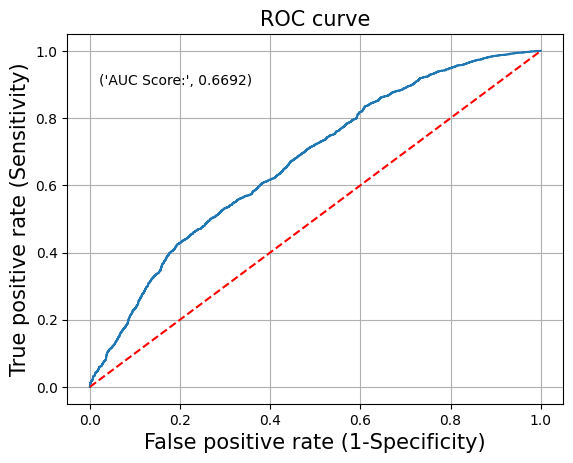

In [105]:
# call the function to plot the ROC curve
# pass the gaussian naive bayes model to the function
plot_roc(gnb_model, test_data=X_test)

## Decision Tree Classifier Model

In [106]:
# instantiate the 'DecisionTreeClassifier' object using 'entropy' criterion
# pass the 'random_state' to obtain the same samples for each time you run the code
decision_tree_classification = DecisionTreeClassifier(criterion = 'entropy', random_state = 10)

# fit the model using fit() on train data
decision_tree = decision_tree_classification.fit(X_train, y_train)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

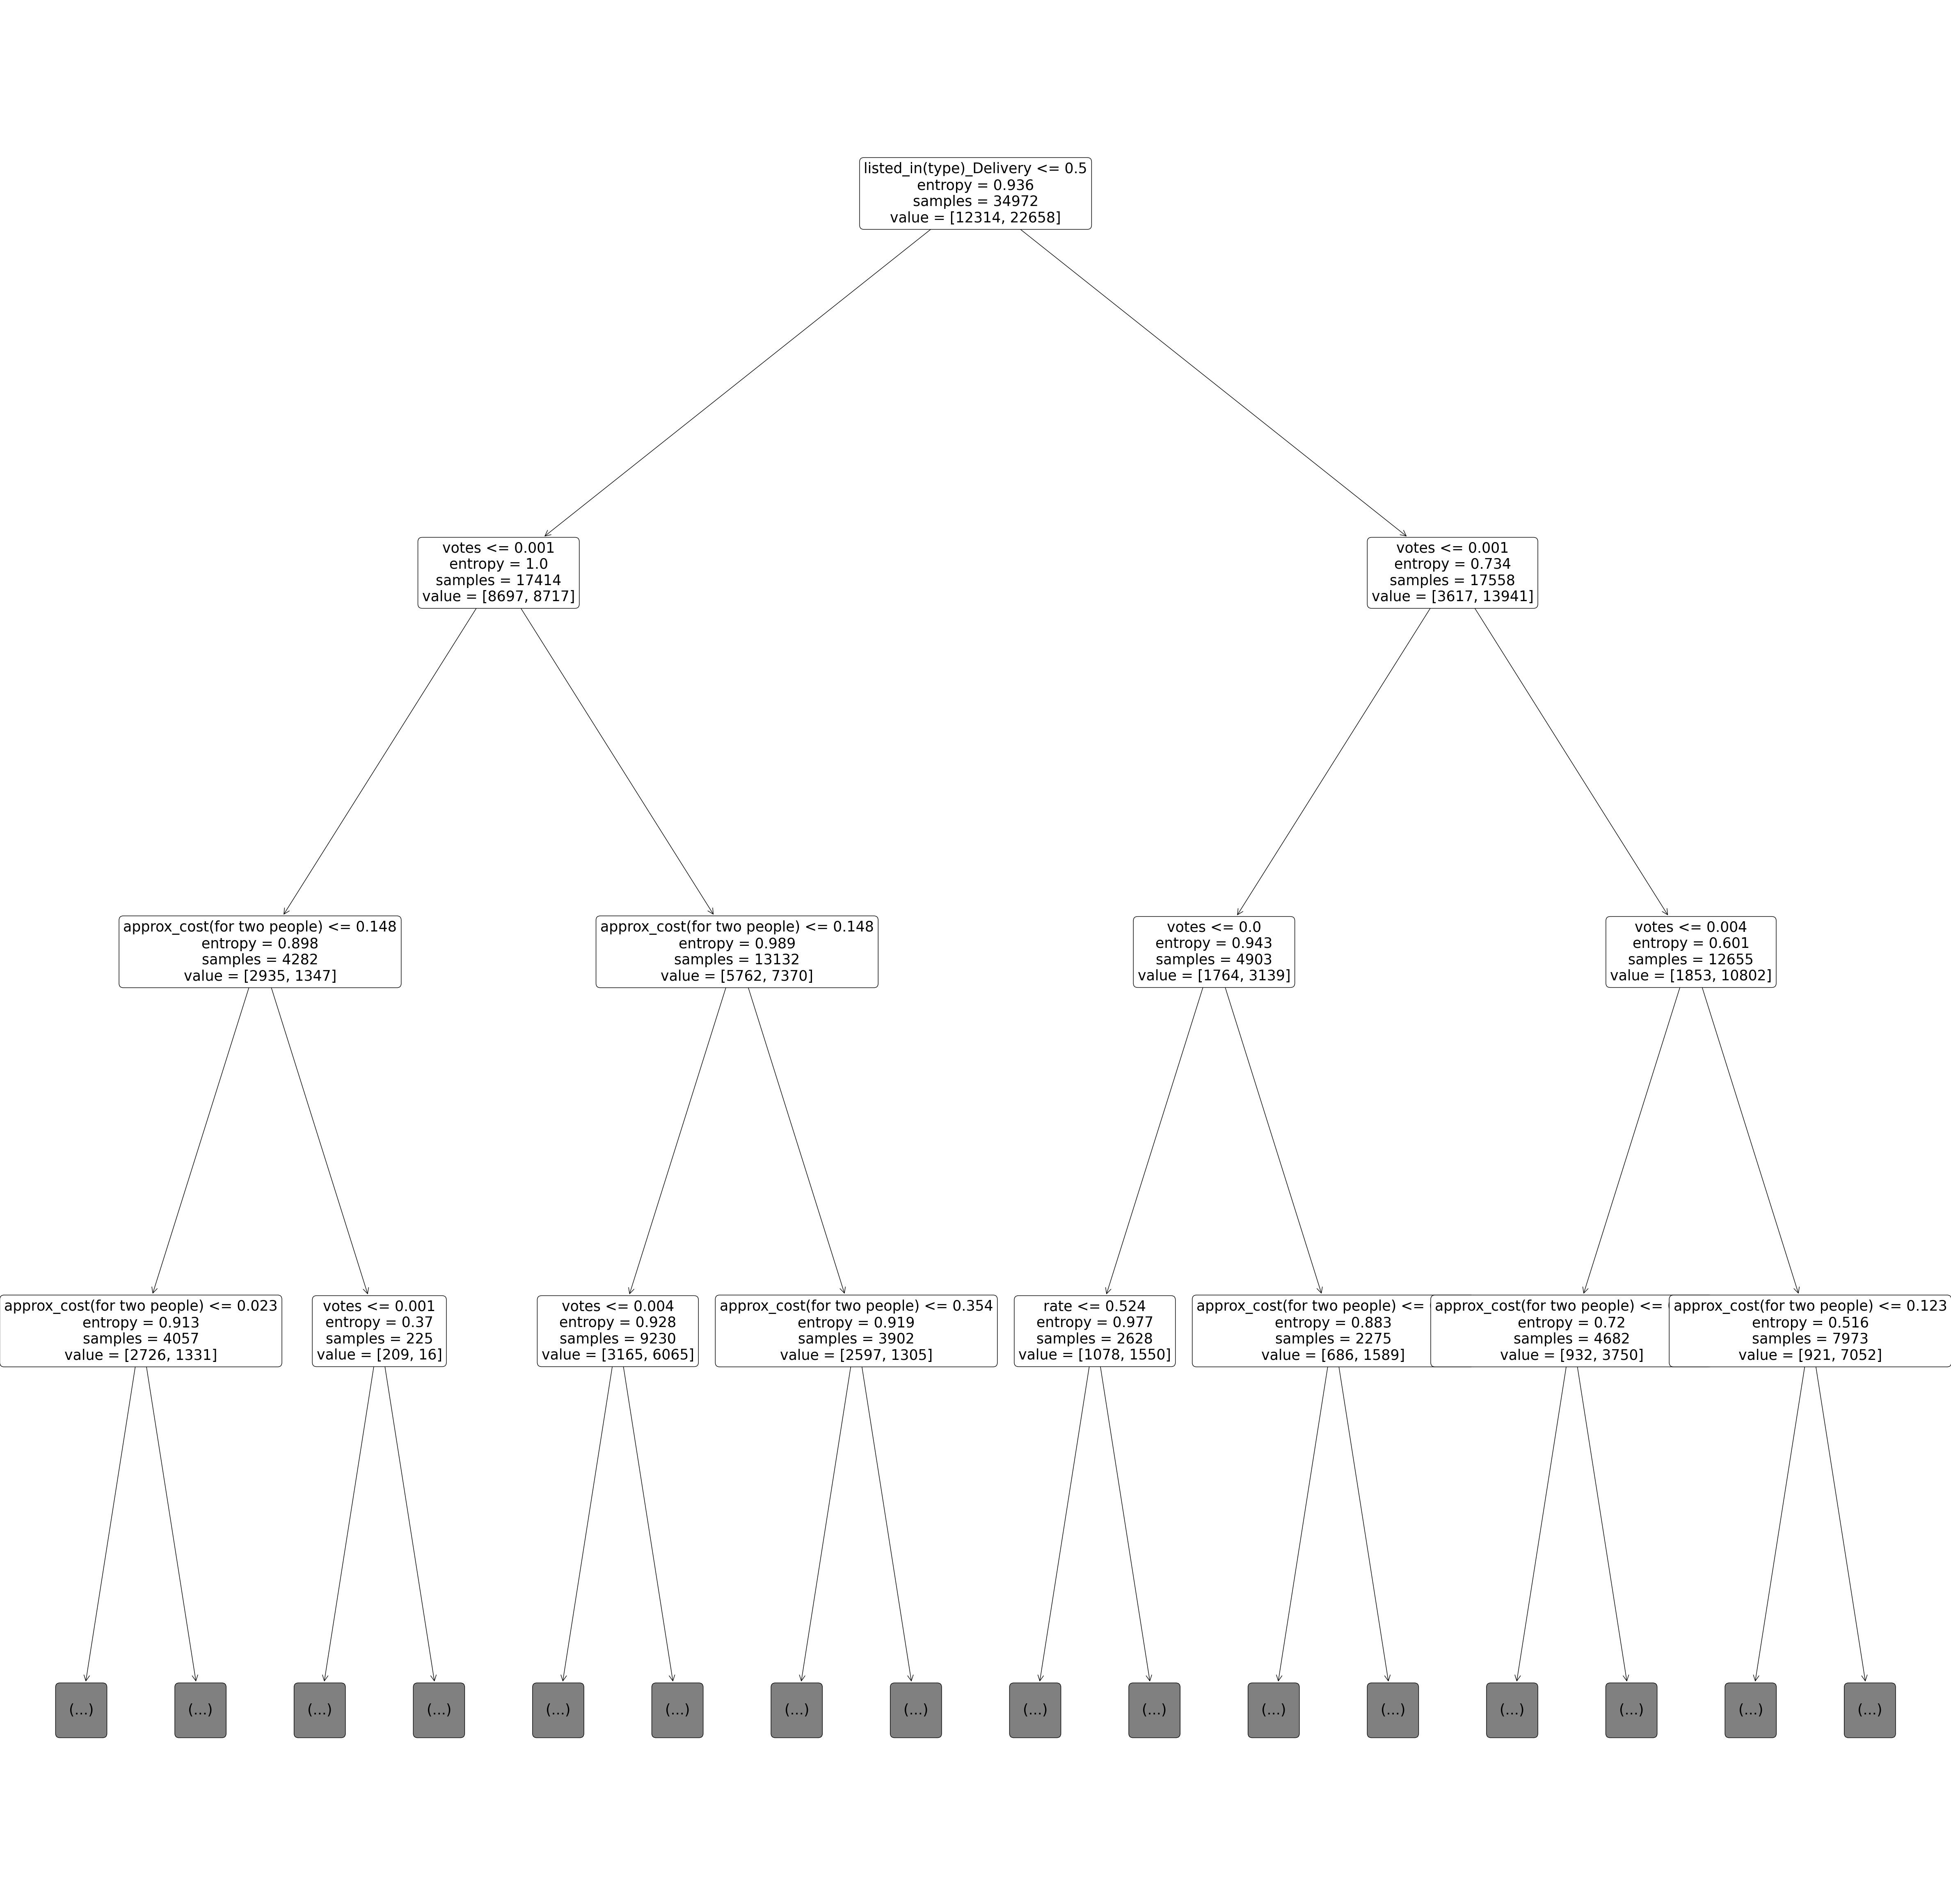

In [107]:
fig, ax = plt.subplots(figsize=(60, 60))  # Adjust figure size as needed
tree.plot_tree(decision_tree,max_depth=3,feature_names=X_train.columns,rounded=True,fontsize=25, ax=ax)

plt.show()


In [108]:
# create a generalized function to calculate the metrics values for train set
def get_train_report(model):
    
    # for training set:
    # train_pred: prediction made by the model on the train dataset 'X_train'
    # y_train: actual values of the target variable for the train dataset

    # predict the output of the target variable from the train data 
    train_pred = model.predict(X_train)

    # return the performace measures on train set
    return(classification_report(y_train, train_pred))

In [109]:
# create a generalized function to calculate the metrics values for test set
def get_test_report(model):
    
    # for test set:
    # test_pred: prediction made by the model on the test dataset 'X_test'
    # y_test: actual values of the target variable for the test dataset

    # predict the output of the target variable from the test data 
    test_pred = model.predict(X_test)

    # return the performace measures on test set
    return(classification_report(y_test, test_pred))

In [114]:
# compute the performance measures on train data
# call the function 'get_train_report'
# pass the decision tree to the function
train_report = get_train_report(decision_tree)

# print the performance measures
print(train_report)

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     12314
           1       1.00      0.98      0.99     22658

    accuracy                           0.99     34972
   macro avg       0.98      0.99      0.99     34972
weighted avg       0.99      0.99      0.99     34972



In [115]:
# compute the performance measures on train data
# call the function 'get_train_report'
# pass the decision tree to the function
train_report = get_test_report(decision_tree)

# print the performance measures
print(train_report)

              precision    recall  f1-score   support

           0       0.70      0.71      0.71      3080
           1       0.84      0.83      0.84      5663

    accuracy                           0.79      8743
   macro avg       0.77      0.77      0.77      8743
weighted avg       0.79      0.79      0.79      8743



In [120]:
# create a dictionary with hyperparameters and its values
# pass the criteria 'entropy' and 'gini' to the parameter, 'criterion' 
# pass a list of values to 'max_depth' that assigns maximum depth of the tree
# 'max_features' assigns maximum number of features to consider for the best split. We pass the string 'sqrt' and 'log2'
# 'sqrt' considers maximum number of features equal to the square root of total features
# 'log2' considers maximum number of features equal to the log of total features with base 2
# pass a list of values to 'min_samples_split' that assigns minimum number of samples to split an internal node
# pass a list of values to 'min_samples_leaf' that assigns minimum number of samples required at the terminal/leaf node
# pass a list of values to 'max_leaf_nodes' that assigns maximum number of leaf nodes in the tree
tuned_paramaters = [{'criterion': ['entropy', 'gini'],
                     'max_depth': [10, 15, 20],
                     'max_features': ['sqrt', 'log2'],
                     'min_samples_split': [2, 5],
                     'min_samples_leaf': [1, 5],
                     'max_leaf_nodes': [2, 5]}]
 
# instantiate the 'DecisionTreeClassifier' 
# pass the 'random_state' to obtain the same samples for each time you run the code
decision_tree_classification = DecisionTreeClassifier(random_state = 10)

# use GridSearchCV() to find the optimal value of the hyperparameters
# estimator: pass the DecisionTreeClassifier model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 5
dt_grid = GridSearchCV(estimator = decision_tree_classification, 
                       param_grid = tuned_paramaters, 
                       cv = 5)

# use fit() to fit the model on the train set
dt_grid_model = dt_grid.fit(X_train, y_train)

# get the best parameters
print('Best parameters for decision tree classifier: ', dt_grid_model.best_params_, '\n')

Best parameters for decision tree classifier:  {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'max_leaf_nodes': 5, 'min_samples_leaf': 1, 'min_samples_split': 2} 



In [121]:
# instantiate the 'DecisionTreeClassifier'
# 'best_params_' returns the dictionary containing best parameter values and parameter name  
# 'get()' returns the value of specified parameter
# pass the 'random_state' to obtain the same samples for each time you run the code
dt_model = DecisionTreeClassifier(criterion = dt_grid_model.best_params_.get('criterion'), 
                                  max_depth = dt_grid_model.best_params_.get('max_depth'),
                                  max_features = dt_grid_model.best_params_.get('max_features'),
                                  max_leaf_nodes = dt_grid_model.best_params_.get('max_leaf_nodes'),
                                  min_samples_leaf = dt_grid_model.best_params_.get('min_samples_leaf'),
                                  min_samples_split = dt_grid_model.best_params_.get('min_samples_split'),
                                  random_state = 10)

# use fit() to fit the model on the train set
dt_model = dt_model.fit(X_train, y_train)

# print the performance measures for test set for the model with best parameters
print('Classification Report for test set:\n', get_test_report(dt_model))

Classification Report for test set:
               precision    recall  f1-score   support

           0       0.58      0.22      0.32      3080
           1       0.68      0.92      0.78      5663

    accuracy                           0.67      8743
   macro avg       0.63      0.57      0.55      8743
weighted avg       0.65      0.67      0.62      8743



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

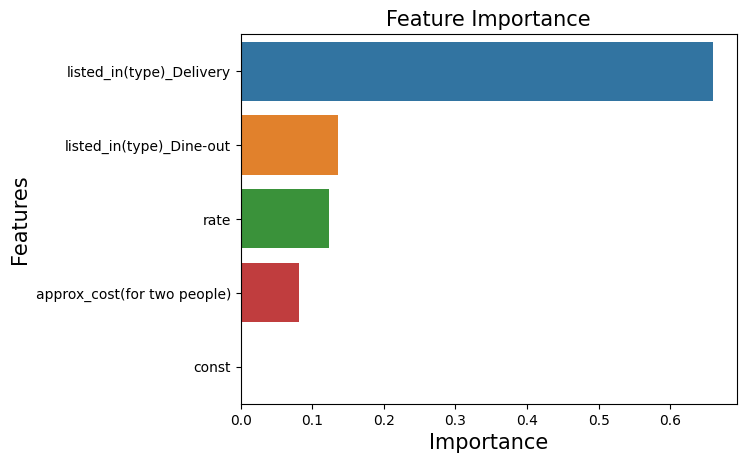

In [122]:
# create a dataframe that stores the feature names and their importance
# 'feature_importances_' returns the features based on the gini importance
important_features = pd.DataFrame({'Features': X_train.columns, 
                                   'Importance': dt_model.feature_importances_})

# sort the dataframe in the descending order according to the feature importance
important_features = important_features.sort_values('Importance', ascending = False).head()

# create a barplot to visualize the features based on their importance
sns.barplot(x = 'Importance', y = 'Features', data = important_features)

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Feature Importance', fontsize = 15)
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15)

# display the plot
plt.show()

## Random Forest Classifier Model

In [123]:
# instantiate the 'RandomForestClassifier'
# pass the required number of trees in the random forest to the parameter, 'n_estimators'
# pass the 'random_state' to obtain the same samples for each time you run the code
rf_classification = RandomForestClassifier(n_estimators = 10, random_state = 10)

# use fit() to fit the model on the train set
rf_model = rf_classification.fit(X_train, y_train)

In [124]:
# compute the performance measures on train data
# call the function 'get_train_report'
# pass the random forest model to the function
train_report = get_train_report(rf_model)

# print the performace measures
print(train_report) 

              precision    recall  f1-score   support

           0       0.96      0.97      0.96     12314
           1       0.98      0.98      0.98     22658

    accuracy                           0.98     34972
   macro avg       0.97      0.97      0.97     34972
weighted avg       0.98      0.98      0.98     34972



In [125]:
# compute the performance measures on test data
# call the function 'get_test_report'
# pass the random forest model to the function
test_report = get_test_report(rf_model)

# print the performace measures
print(test_report) 

              precision    recall  f1-score   support

           0       0.62      0.60      0.61      3080
           1       0.79      0.80      0.79      5663

    accuracy                           0.73      8743
   macro avg       0.70      0.70      0.70      8743
weighted avg       0.73      0.73      0.73      8743



In [126]:
# create a dictionary with hyperparameters and its values
# pass the criteria 'entropy' and 'gini' to the parameter, 'criterion' 
# pass a list of values to 'n_estimators' to build the different number of trees in the random forest
# pass a list of values to 'max_depth' that assigns maximum depth of the tree
# 'max_features' assigns maximum number of features to consider for the best split. We pass the string 'sqrt' and 'log2'
# 'sqrt' considers maximum number of features equal to the square root of total features
# 'log2' considers maximum number of features equal to the log of total features with base 2
# pass a list of values to 'min_samples_split' that assigns minimum number of samples to split an internal node
# pass a list of values to 'min_samples_leaf' that assigns minimum number of samples required at the terminal/leaf node
# pass a list of values to 'max_leaf_nodes' that assigns maximum number of leaf nodes in the tree
tuned_paramaters = [{'criterion': ['entropy', 'gini'],
                     'n_estimators': [10, 30, 50],
                     'max_depth': [10, 15, 20],
                     'max_features': ['sqrt', 'log2'],
                     'min_samples_split': [2, 5],
                     'min_samples_leaf': [1, 5],
                     'max_leaf_nodes': [2, 5]}]
 
# instantiate the 'RandomForestClassifier' 
# pass the 'random_state' to obtain the same samples for each time you run the code
random_forest_classification = RandomForestClassifier(random_state = 10)

# use GridSearchCV() to find the optimal value of the hyperparameters
# estimator: pass the random forest classifier model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 5
rf_grid = GridSearchCV(estimator = random_forest_classification, 
                       param_grid = tuned_paramaters, 
                       cv = 5)

# use fit() to fit the model on the train set
rf_grid_model = rf_grid.fit(X_train, y_train)

# get the best parameters
print('Best parameters for random forest classifier: ', rf_grid_model.best_params_, '\n')

Best parameters for random forest classifier:  {'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'max_leaf_nodes': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 10} 



In [127]:
# instantiate the 'RandomForestClassifier'
# 'best_params_' returns the dictionary containing best parameter values and parameter name  
# 'get()' returns the value of specified parameter
# pass the 'random_state' to obtain the same samples for each time you run the code
rf_model = RandomForestClassifier(criterion = rf_grid_model.best_params_.get('criterion'), 
                                  n_estimators = rf_grid_model.best_params_.get('n_estimators'),
                                  max_depth = rf_grid_model.best_params_.get('max_depth'),
                                  max_features = rf_grid_model.best_params_.get('max_features'),
                                  max_leaf_nodes = rf_grid_model.best_params_.get('max_leaf_nodes'),
                                  min_samples_leaf = rf_grid_model.best_params_.get('min_samples_leaf'),
                                  min_samples_split = rf_grid_model.best_params_.get('min_samples_split'),
                                  random_state = 10)

# use fit() to fit the model on the train set
rf_model = rf_model.fit(X_train, y_train)

# print the performance measures for test set for the model with best parameters
print('Classification Report for test set:\n', get_test_report(rf_model))

Classification Report for test set:
               precision    recall  f1-score   support

           0       0.69      0.38      0.49      3080
           1       0.73      0.91      0.81      5663

    accuracy                           0.72      8743
   macro avg       0.71      0.64      0.65      8743
weighted avg       0.71      0.72      0.69      8743



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

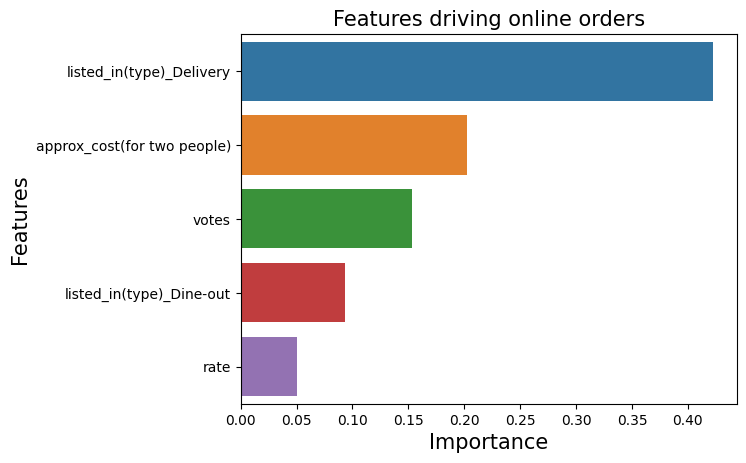

In [130]:
# create a dataframe that stores the feature names and their importance
# 'feature_importances_' returns the features based on the gini importance
important_features = pd.DataFrame({'Features': X_train.columns, 
                                   'Importance': rf_model.feature_importances_})

# sort the dataframe in the descending order according to the feature importance
important_features = important_features.sort_values('Importance', ascending = False).head()

# create a barplot to visualize the features based on their importance
sns.barplot(x = 'Importance', y = 'Features', data = important_features)

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Features driving online orders', fontsize = 15)
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15)

# display the plot
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

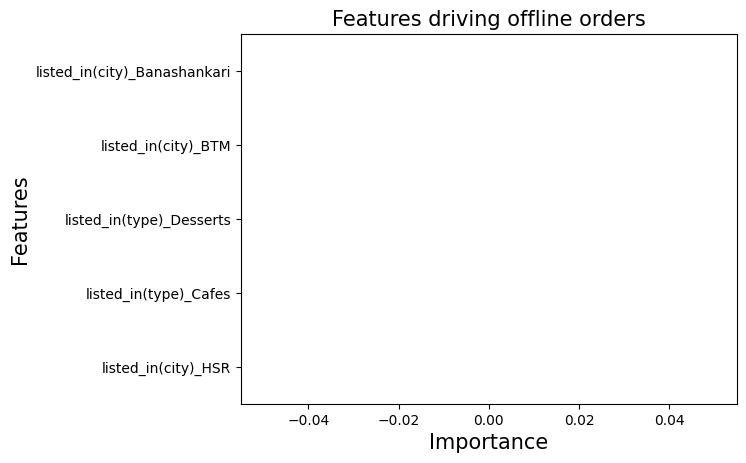

In [131]:
# create a dataframe that stores the feature names and their importance
# 'feature_importances_' returns the features based on the gini importance
important_features = pd.DataFrame({'Features': X_train.columns, 
                                   'Importance': rf_model.feature_importances_})

# sort the dataframe in the descending order according to the feature importance
important_features = important_features.sort_values('Importance', ascending = False).tail()

# create a barplot to visualize the features based on their importance
sns.barplot(x = 'Importance', y = 'Features', data = important_features)

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Features driving offline orders', fontsize = 15)
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15)

# display the plot
plt.show()

In [129]:
#Since Random Forest Classifier gives better metrics than Decision tree, The Best features of random tree classifier are used.